**Breast Cancer Classification with a simple Artificial Neural Network**



---

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# loading the breast cancer dataset from csv file to pandas data frame
breast_cancer_data = pd.read_csv('/content/breast_cancer_data.csv')

In [ ]:
# printing the first five rows of the dataframe
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#removing the unnamed column
breast_cancer_data.drop(columns='Unnamed: 32', axis=1, inplace=True)

In [ ]:
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_cancer_data.shape

(569, 32)

In [ ]:
# checking the data types
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# drop id column
breast_cancer_data.drop(columns='id', axis=1, inplace=True)

In [ ]:
breast_cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Statistical summary of the data - Descriptive Statistics

In [ ]:
breast_cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# how many benign and malignant cases in the dataset
breast_cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# encoding the target column
label_encode = LabelEncoder()

labels = label_encode.fit_transform(breast_cancer_data['diagnosis']) # transforms B and M to 1 and 0

breast_cancer_data['target'] = labels

breast_cancer_data.drop(columns='diagnosis', axis=1, inplace=True)

In [ ]:
# diagnosis column removed
breast_cancer_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
breast_cancer_data['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

Benign -> 0

Malignant -> 1

Although slight imbalance in data, it is fine in this case

In [ ]:
# grouping the data based on the target
breast_cancer_data.groupby('target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Inference: We can clearly see that for most of the features, the mean values are higher for Malignant(1) cases and lower for Benign(0) cases

**Summary from Data Analysis:**
1. No missing Values
2. All are continuous numerical values except for Target column
3. Mean is slightly more than the median for most of the features. So it is right skewed.
4. Slight imbalance in the dataset (Benign(0) cases are more than Malignant(1) cases
5. Mean of most features are clearly larger for Malignant cases compared to the benign cases (Groupby)




---

Seperating the features and the target

In [ ]:
X = breast_cancer_data.drop(columns='target', axis=1)
Y = breast_cancer_data['target']

In [ ]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64


Splitting the data into training data and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_test.shape, X_train.shape)

(569, 30) (114, 30) (455, 30)


Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [ ]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


Building the Neural Network

In [ ]:
# importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3) # so we don't get different values every time we run it
from tensorflow import keras

In [ ]:
# setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), # input layer, for X_train we have a 569x30 matrix, so we have to flatten it(convert it to a single dimensional array)
    keras.layers.Dense(20, activation='relu'), # hidden layer(20 neurons), dense means all neurons in the layer is conencted to all neurons in the previous layer
    keras.layers.Dense(2, activation='sigmoid') # output layer, number of neurons = number of classes, so 2 neurons
])

In [ ]:
# compiling the Neural Network with some factors

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Neural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 13ms/step - loss: 0.9959 - accuracy: 0.3594 - val_loss: 0.6775 - val_accuracy: 0.6087
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.6186 - val_loss: 0.4402 - val_accuracy: 0.8696
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.8142 - val_loss: 0.3170 - val_accuracy: 0.9130
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.3296 - accuracy: 0.8729 - val_loss: 0.2517 - val_accuracy: 0.9348
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.2638 - accuracy: 0.9169 - val_loss: 0.2140 - val_accuracy: 0.9130
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.2226 - accuracy: 0.9364 - val_loss: 0.1893 - val_accuracy: 0.9348
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1952 - accuracy: 0.9438 - val_loss: 0.1718 - val_accuracy: 0.9348
Epoch 8/20
13/13 [=

Visualizing accuracy and loss

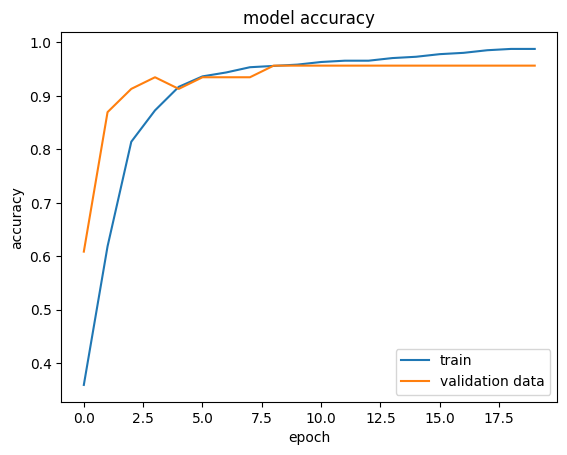

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'validation data'], loc='lower right') # loc -> location

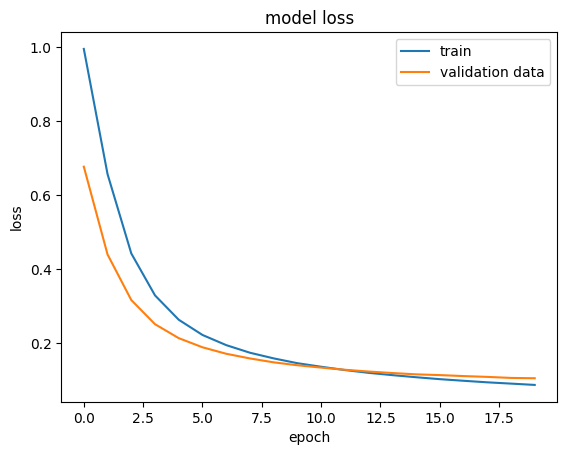

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation data'], loc='upper right') # loc -> location

Accuracy of the model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.1203 - accuracy: 0.9649
0.9649122953414917


In [ ]:
loss, accuracy = model.evaluate(X_train_std, Y_train)
print(accuracy)

15/15 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9846
0.9846153855323792


In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [ ]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 2ms/step


In [ ]:
print(Y_pred.shape)
print(Y_pred[0])
# [0   1]

(114, 2)
[0.47919872 0.1046449 ]


In [ ]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [ ]:
print(Y_pred)

[[4.79198724e-01 1.04644902e-01]
 [5.67286372e-01 5.33865213e-01]
 [9.58390713e-01 2.74587385e-02]
 [9.24701861e-04 9.95521128e-01]
 [5.68319619e-01 4.19619441e-01]
 [1.55147295e-02 9.78214562e-01]
 [7.82005847e-01 2.75389761e-01]
 [9.54363823e-01 1.86591912e-02]
 [8.77960801e-01 1.06286570e-01]
 [8.56061280e-01 5.07958494e-02]
 [4.08477575e-01 3.13236147e-01]
 [8.81999016e-01 9.90335792e-02]
 [7.67565310e-01 8.54192525e-02]
 [7.76217997e-01 1.53259665e-01]
 [9.09250498e-01 8.15094784e-02]
 [1.96237594e-01 7.93453634e-01]
 [9.31680441e-01 3.29819135e-02]
 [8.64948511e-01 3.72021720e-02]
 [8.19272399e-01 3.43128256e-02]
 [2.76378766e-02 9.34939086e-01]
 [5.08069575e-01 5.03641786e-04]
 [9.43413913e-01 3.15988623e-02]
 [8.51450264e-01 9.40246806e-02]
 [9.29848909e-01 1.81818251e-02]
 [7.19992340e-01 1.36902213e-01]
 [4.73565608e-02 9.25559640e-01]
 [8.67988706e-01 8.09979215e-02]
 [6.17394328e-01 2.93308973e-01]
 [9.50776488e-02 8.11168969e-01]
 [6.80682138e-02 9.26660180e-01]
 [7.569198

model.predict() gives the prediction probability for each class of the datapoint

In [ ]:
# argmax function
my_list = [0.25, 0.78]

index_of_max_value = np.argmax(my_list) # find the index of the biggest number
print(my_list)
print(index_of_max_value)

[0.25, 0.78]
1


In [ ]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]


Build Predictive System

In [ ]:
input_data = (11.25,14.78,71.38,390,0.08306,0.04458,0.0009737,0.002941,0.1773,0.06081,0.2144,0.9961,1.529,15.07,0.005617,0.007124,0.0009737,0.002941,0.017,0.00203,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418)

# change input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array since we are predicting for ONE data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 1):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 15ms/step
[[0.95930773 0.01303046]]
[0]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'breast_cancer_model.sav'
pickle.dump(model, open(filename, 'wb'))

with open('breast_cancer_scaler.sav', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
loading_model = pickle.load(open('breast_cancer_model.sav', 'rb'))
loading_scaler = pickle.load(open('breast_cancer_scaler.sav', 'rb'))